<a href="https://colab.research.google.com/github/joykiriba/DS-CORE-WEEK7-IP/blob/main/IP_WEEK7_%22Moringa_Data_Science_Core_W7_Independent_Project_2021_05_Joy_Kiriba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices for Hass Consulting Company a real estate leader with over 25 years of experience.

##**1**. Defining the Question




### a) Specifying the Data Analytic Question

How can we predict housing prices given a selection of factors?

### b) Defining the Metric for Success
Deriving a high accuracy level from the prediction models we use.


### c) Understanding the context
As a Data Scientist working for Hass Consulting Company which is a real estate leader with over 25 years of experience, I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 





### d) Recording the Experimental Design
### The process will entail: 
Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording my observations.

Performing regression analysis.
Incorporate categorical independent variables into the models.
Check for multicollinearity.

Provide a recommendation based on the analysis. 
Create residual plots for the models, and assess heteroskedasticity using Barlett's test.

Challenge the solution by providing insights on how we can make improvements in model improvement.   


### e) Data Relevance

The appropriate dataset to use for this project is that which contains data with information on real estate properties collected over the past few months


##**2**. Reading the Data

In [1]:
# importing necessary libraries
# 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Loading the Data from the source- house data
# ---
#
house = pd.read_csv('house_data.csv')



##**3**. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
house.shape

(21613, 20)

In [4]:
# Previewing our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Checking whether each column has appropriate datatypes
#
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# to get general info on the dataframes

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
# to get a statistical summary of the dataframe

house.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##**4**. External Data Source Validation

### a.Validation

##**5**. Tidying the Dataset

In [9]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# dropping unnecesary columns
# 

house.drop(['id','lat', 'long'], axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [11]:
# check for duplicates

house.duplicated().sum()



6

In [15]:
# removing duplicates
# 
house.drop_duplicates()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [18]:
# Identifying the Missing Data
#
house.isnull().sum()



price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
# Dealing with the Missing Data
#
# there are no missing values

In [19]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

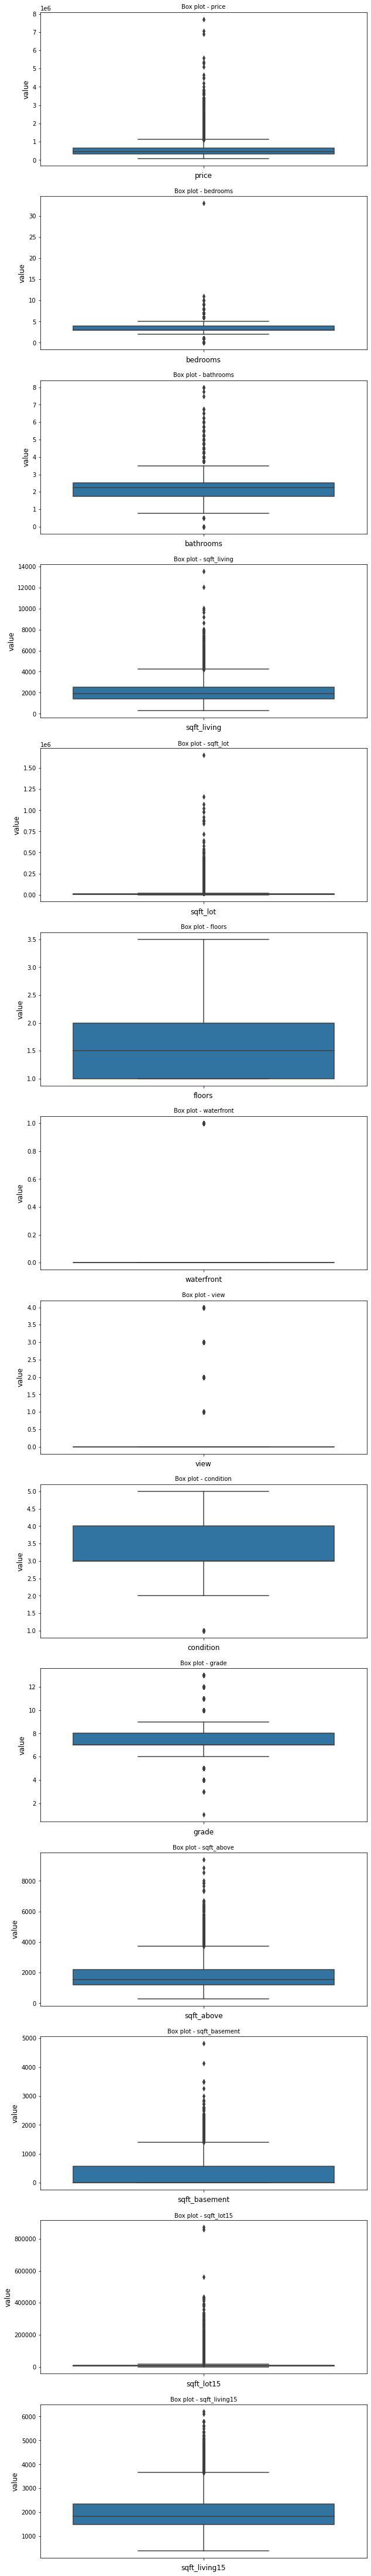

In [20]:
#Checking for outliers
# 

col_names = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','sqft_lot15', 'sqft_living15']

fig,ax = plt.subplots(len(col_names),figsize=(10,80))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=12)
  ax[i].set_ylabel('value', fontsize=12)
plt.show()

In [21]:
# getting rid of the outliers

Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
house = house[~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]
print(house.shape)

(15068, 17)


In [22]:
# check the unique values of view and waterfront 

print(house['view'].unique())
print(house['waterfront'].unique())
print(house['yr_renovated'].unique())

[0]
[0]
[0]


In [19]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [23]:
# drop the view, yr_renovated and waterfront columns
# 

house.drop(['view', 'waterfront','yr_renovated'], axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,1340,5650
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,98003,2238,6819


##**6**. Exploratory Data Analysis

### 6.1 Univariate Analysis


In [24]:
# getting a statistical summary of our dataset

house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,4.376672e+05,3.261415,1.972060,1813.577117,7018.311455,1.471031,3.418569,7.379214,1585.963698,227.613419,1971.832758,98079.434032,1796.134922,6898.717414
std,1.796671e+05,0.771381,0.645469,614.425156,3367.262524,0.547329,0.646379,0.803984,601.609884,352.487803,29.197270,53.350295,507.817614,3003.002091
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,620.000000,651.000000
25%,3.000000e+05,3.000000,1.500000,1350.000000,4720.000000,1.000000,3.000000,7.000000,1140.000000,0.000000,1953.000000,98033.000000,1420.000000,4800.000000
50%,4.050000e+05,3.000000,2.000000,1740.000000,7068.000000,1.000000,3.000000,7.000000,1430.000000,0.000000,1975.000000,98065.000000,1700.000000,7200.000000
75%,5.450000e+05,4.000000,2.500000,2210.000000,8991.000000,2.000000,4.000000,8.000000,1910.000000,440.000000,1999.000000,98118.000000,2090.000000,8700.000000
max,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,5.000000,9.000000,3740.000000,1400.000000,2015.000000,98199.000000,3640.000000,17550.000000


In [25]:
# getting the median of the continuous variables
cols1 = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_lot15', 'sqft_living15']

median1 = house[cols1].median()

median1.sort_values(ascending=False)


price            405000.0
sqft_lot15         7200.0
sqft_lot           7068.0
sqft_living        1740.0
sqft_living15      1700.0
sqft_above         1430.0
grade                 7.0
condition             3.0
bedrooms              3.0
bathrooms             2.0
floors                1.0
sqft_basement         0.0
dtype: float64

In [26]:
# getting the skewness of the continuous variables
# 

cols1 = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_lot15', 'sqft_living15']

skewed = house[cols1].skew()

skewed.sort_values(ascending=False)


sqft_basement    1.331673
condition        1.121608
sqft_above       0.963787
price            0.837129
floors           0.770010
sqft_living15    0.752538
sqft_living      0.550211
sqft_lot         0.523125
grade            0.318633
sqft_lot15       0.300766
bedrooms         0.245395
bathrooms       -0.093643
dtype: float64

In [27]:
# getting the kurtosis of the continuous variables
# 

cols1 = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_lot15', 'sqft_living15']

kurt1 = house[cols1].kurt()

kurt1.sort_values(ascending=False)


sqft_basement    0.527250
sqft_lot         0.462602
price            0.420611
sqft_above       0.400829
condition        0.326418
sqft_living15    0.286965
sqft_lot15       0.184535
sqft_living     -0.096169
floors          -0.224831
bedrooms        -0.264473
grade           -0.335445
bathrooms       -0.815552
dtype: float64

In [39]:
# getting the variance of the continuous variables
# 

cols1 = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','sqft_lot15', 'sqft_living15']

var1 = house[cols1].var()

var1.sort_values(ascending=False)


price            3.228027e+10
sqft_lot         1.133846e+07
sqft_lot15       9.018022e+06
sqft_living      3.775183e+05
sqft_above       3.619345e+05
sqft_living15    2.578787e+05
sqft_basement    1.242477e+05
grade            6.463908e-01
bedrooms         5.950280e-01
condition        4.178061e-01
bathrooms        4.166299e-01
floors           2.995689e-01
dtype: float64

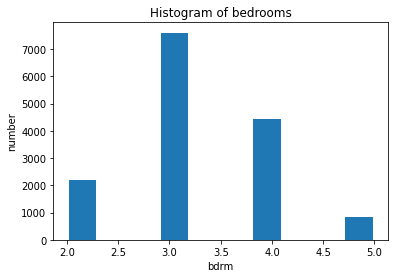

In [29]:
# plotting a histogram to show bedroom distribution.
# 

bdrm = house['bedrooms']

plt.hist(bdrm, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('bdrm')
plt.ylabel('number')
plt.title('Histogram of bedrooms') 
plt.show()

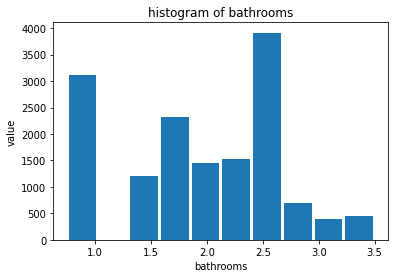

In [30]:
# Histogram to show bathrooms distribution
# 

baths = house['bathrooms']

plt.hist(baths, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('bathrooms')
plt.ylabel('value')
plt.title('histogram of bathrooms')
plt.show()

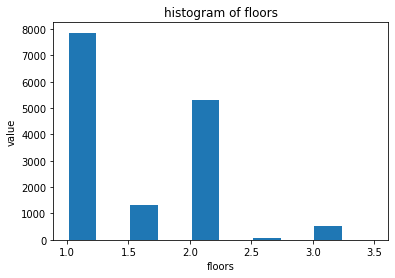

In [31]:
# histogram to show floors distribution
# 

floor = house['floors']

plt.hist(floor, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('floors')
plt.ylabel('value')
plt.title('histogram of floors')
plt.show()

Observations:


*   Most houses have 3 bedrooms
*   Houses with 2.5 bathrooms are predominant
*   Most houses have only 1 floor



Categorical Variables

In [32]:
# Getting a frequency table for the zipcode
# 

house['zipcode'].value_counts()

98103    496
98038    470
98115    469
98034    457
98117    454
        ... 
98010     35
98077     27
98024     18
98070     11
98039      6
Name: zipcode, Length: 70, dtype: int64

In [33]:
# getting the frequency table for the year built
# 

house['yr_built'].value_counts()


2014    438
2005    354
2003    343
2006    333
2004    330
       ... 
1936     20
1932     16
1933     10
1934      8
1935      8
Name: yr_built, Length: 116, dtype: int64

Observations


*   The zip code with the most houses is 98103
*   2014 is the year when most houses were built



In [34]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 6.2 Bivariate Analysis

In [40]:
# Getting the correlation matrix
# 

correlations = house.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.240541,0.342113,0.515427,-0.089639,0.228982,0.084131,0.527996,0.408794,0.200737,-0.011728,-0.005168,0.449073,-0.100468
bedrooms,0.240541,1.000000,0.444362,0.614892,0.200711,0.130887,0.028786,0.291225,0.486672,0.241196,0.160286,-0.188022,0.414712,0.191379
bathrooms,0.342113,0.444362,1.000000,0.670040,-0.089191,0.525661,-0.158169,0.585230,0.593916,0.154285,0.603797,-0.248937,0.517089,-0.092565
sqft_living,0.515427,0.614892,0.670040,1.000000,0.158914,0.320174,-0.069356,0.623327,0.832158,0.322821,0.352167,-0.237880,0.728358,0.143435
sqft_lot,-0.089639,0.200711,-0.089191,0.158914,1.000000,-0.414294,0.147325,-0.034580,0.111188,0.087233,-0.103415,-0.260664,0.192427,0.883064
floors,0.228982,0.130887,0.525661,0.320174,-0.414294,1.000000,-0.301813,0.473523,0.520042,-0.329485,0.551709,-0.059525,0.258378,-0.421601
condition,0.084131,0.028786,-0.158169,-0.069356,0.147325,-0.301813,1.000000,-0.190001,-0.189868,0.203161,-0.405417,0.003367,-0.132838,0.148337
grade,0.527996,0.291225,0.585230,0.623327,-0.034580,0.473523,-0.190001,1.000000,0.638235,-0.002783,0.509271,-0.213061,0.605391,-0.026425
sqft_above,0.408794,0.486672,0.593916,0.832158,0.111188,0.520042,-0.189868,0.638235,1.000000,-0.256210,0.474639,-0.306843,0.711731,0.097848
sqft_basement,0.200737,0.241196,0.154285,0.322821,0.087233,-0.329485,0.203161,-0.002783,-0.256210,1.000000,-0.196226,0.109055,0.054859,0.083021


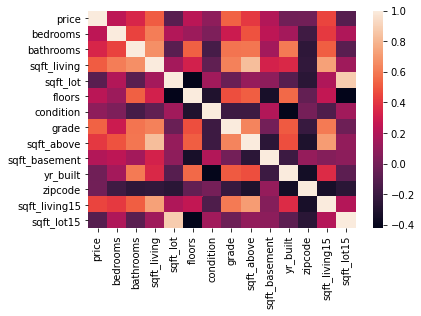

In [41]:
# plotting a heatmap
# 

import seaborn as sns

sns.heatmap(house.corr())

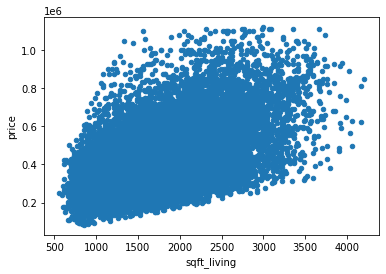

In [42]:
# plotting a scatter plot of the sqft living and price
# 

house.plot(x = 'sqft_living', y = 'price', kind='scatter')


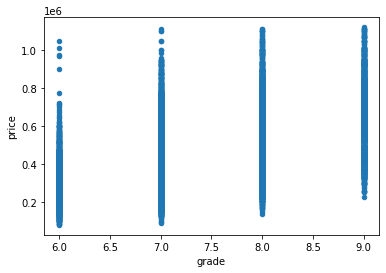

In [43]:
# plotting a scatter plot of the grade and price
# 

house.plot(x = 'grade', y = 'price', kind='scatter')


Observations:


*   The sqft_living and grade are highly correlated with the price, both having a correlation of above 0.5
*   The number of bedrooms and bathrooms are highly correlated to the sqft living.


*   Year built is highly correlated to the bathrooms, floors and grade








##**7**. Implementing the Solution

### Checking for multicollinearity

In [44]:
#Import libaries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [45]:
# checking for multicollinearity
# 
correlations = house.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.240541,0.342113,0.515427,-0.089639,0.228982,0.084131,0.527996,0.408794,0.200737,-0.011728,-0.005168,0.449073,-0.100468
bedrooms,0.240541,1.000000,0.444362,0.614892,0.200711,0.130887,0.028786,0.291225,0.486672,0.241196,0.160286,-0.188022,0.414712,0.191379
bathrooms,0.342113,0.444362,1.000000,0.670040,-0.089191,0.525661,-0.158169,0.585230,0.593916,0.154285,0.603797,-0.248937,0.517089,-0.092565
sqft_living,0.515427,0.614892,0.670040,1.000000,0.158914,0.320174,-0.069356,0.623327,0.832158,0.322821,0.352167,-0.237880,0.728358,0.143435
sqft_lot,-0.089639,0.200711,-0.089191,0.158914,1.000000,-0.414294,0.147325,-0.034580,0.111188,0.087233,-0.103415,-0.260664,0.192427,0.883064
floors,0.228982,0.130887,0.525661,0.320174,-0.414294,1.000000,-0.301813,0.473523,0.520042,-0.329485,0.551709,-0.059525,0.258378,-0.421601
condition,0.084131,0.028786,-0.158169,-0.069356,0.147325,-0.301813,1.000000,-0.190001,-0.189868,0.203161,-0.405417,0.003367,-0.132838,0.148337
grade,0.527996,0.291225,0.585230,0.623327,-0.034580,0.473523,-0.190001,1.000000,0.638235,-0.002783,0.509271,-0.213061,0.605391,-0.026425
sqft_above,0.408794,0.486672,0.593916,0.832158,0.111188,0.520042,-0.189868,0.638235,1.000000,-0.256210,0.474639,-0.306843,0.711731,0.097848
sqft_basement,0.200737,0.241196,0.154285,0.322821,0.087233,-0.329485,0.203161,-0.002783,-0.256210,1.000000,-0.196226,0.109055,0.054859,0.083021


In [46]:
# compute the VIF
# 
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,2.015708,0.133996,-0.123691,1.970869e+00,0.133407,-0.160672,-0.173845,-0.887958,-2.434910e+00,-1.537023e+00,0.850713,-0.038633,-0.349357,0.197126
bedrooms,0.133996,1.725120,-0.336456,-1.121450e+00,-0.060018,-0.023152,-0.049384,0.165166,3.537770e-02,2.728565e-02,0.199689,0.061845,0.073796,-0.119953
bathrooms,-0.123691,-0.336456,2.989364,5.976839e-01,0.045354,-0.672270,-0.177592,-0.148980,-1.391068e+00,-1.330124e+00,-1.104489,0.110853,-0.082582,0.143187
sqft_living,1.969737,-1.117391,0.587228,2.424035e+13,-0.243186,0.404306,0.255162,-7.089855,-2.373476e+13,-1.390638e+13,1.699721,0.331589,0.674814,0.326028
sqft_lot,0.133407,-0.060018,0.045354,-2.404298e-01,4.749975,0.406448,0.010482,0.030446,-3.343259e-01,2.297865e-02,0.193645,0.195752,0.111238,-3.885422
floors,-0.160672,-0.023152,-0.672270,3.940599e-01,0.406448,2.763616,0.088750,-0.250211,-1.109822e+00,4.311526e-01,-0.572094,-0.198425,0.305562,0.566634
condition,-0.173845,-0.049384,-0.177592,2.551639e-01,0.010482,0.088750,1.297711,0.047813,-1.979261e-01,-2.107811e-01,0.518847,0.183977,0.174221,-0.132253
grade,-0.887958,0.165166,-0.148980,-7.092339e+00,0.030446,-0.250211,0.047813,2.619229,6.399176e+00,3.890673e+00,-0.766984,-0.044031,-0.424747,-0.124009
sqft_above,-2.431905,0.028666,-1.380166,-2.373476e+13,-0.331289,-1.119124,-0.198116,6.396571,2.323971e+13,1.361633e+13,-1.633560,-0.326667,-2.247351,-0.303178
sqft_basement,-1.534596,0.023432,-1.324385,-1.390638e+13,0.024967,0.426269,-0.210937,3.889389,1.361633e+13,7.977909e+12,-0.813462,-0.409054,-0.839676,-0.090559


The VIF score for each variable is found alongside the downwards sloping diagonal. The sqft_basement has a value of 7.98 which is above 5, showing presence of multicollinearity. We'll remove it and see the effect it has on the scores.

In [47]:
# getting VIF Scores excluding the sqft_basement variable
# 

basement = house.drop(['sqft_basement'], axis=1)

basement_corr = basement.corr()


pd.DataFrame(np.linalg.inv(basement_corr.values), index = basement_corr.index, columns=basement_corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
price,2.015708,0.133996,-0.123691,-0.705234,0.133407,-0.160672,-0.173845,-0.887958,0.187273,0.850713,-0.038633,-0.349357,0.197126
bedrooms,0.133996,1.725120,-0.336456,-1.076546,-0.060018,-0.023152,-0.049384,0.165166,-0.011328,0.199689,0.061845,0.073796,-0.119953
bathrooms,-0.123691,-0.336456,2.989364,-1.721322,0.045354,-0.672270,-0.177592,-0.148980,0.880233,-1.104489,0.110853,-0.082582,0.143187
sqft_living,-0.705234,-1.076546,-1.721322,6.337410,-0.199666,1.147340,-0.112524,-0.310222,-3.542818,0.281766,-0.381436,-0.788834,0.168174
sqft_lot,0.133407,-0.060018,0.045354,-0.199666,4.749975,0.406448,0.010482,0.030446,-0.373901,0.193645,0.195752,0.111238,-3.885422
floors,-0.160672,-0.023152,-0.672270,1.147340,0.406448,2.763616,0.088750,-0.250211,-1.846660,-0.572094,-0.198425,0.305562,0.566634
condition,-0.173845,-0.049384,-0.177592,-0.112524,0.010482,0.088750,1.297711,0.047813,0.161901,0.518847,0.183977,0.174221,-0.132253
grade,-0.887958,0.165166,-0.148980,-0.310222,0.030446,-0.250211,0.047813,2.619229,-0.241658,-0.766984,-0.044031,-0.424747,-0.124009
sqft_above,0.187273,-0.011328,0.880233,-3.542818,-0.373901,-1.846660,0.161901,-0.241658,5.365661,-0.245180,0.371487,-0.814231,-0.148616
yr_built,0.850713,0.199689,-1.104489,0.281766,0.193645,-0.572094,0.518847,-0.766984,-0.245180,2.783145,0.486045,-0.092790,-0.205083


Removing the sqft_basement significantly increases the VIF scores of sqft_living and sqft_above to 6 and 5 respectively. So we try removing the 2 and see the effect they have.


In [48]:
# getting the VIF Scores excluding the sqft_living variable
# 

living = house.drop(['sqft_living'], axis=1)

living_corr = living.corr()


pd.DataFrame(np.linalg.inv(living_corr.values), index = living_corr.index, columns=living_corr.columns)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,2.015708,0.133996,-0.123691,0.133407,-0.160672,-0.173845,-0.887958,-0.503252,-0.404584,0.850713,-0.038633,-0.349357,0.197126
bedrooms,0.133996,1.725120,-0.336456,-0.060018,-0.023152,-0.049384,0.165166,-1.065419,-0.617600,0.199689,0.061845,0.073796,-0.119953
bathrooms,-0.123691,-0.336456,2.989364,0.045354,-0.672270,-0.177592,-0.148980,-0.805187,-0.987500,-1.104489,0.110853,-0.082582,0.143187
sqft_lot,0.133407,-0.060018,0.045354,4.749975,0.406448,0.010482,0.030446,-0.569403,-0.114546,0.193645,0.195752,0.111238,-3.885422
floors,-0.160672,-0.023152,-0.672270,0.406448,2.763616,0.088750,-0.250211,-0.723250,0.658214,-0.572094,-0.198425,0.305562,0.566634
condition,-0.173845,-0.049384,-0.177592,0.010482,0.088750,1.297711,0.047813,0.051724,-0.064554,0.518847,0.183977,0.174221,-0.132253
grade,-0.887958,0.165166,-0.148980,0.030446,-0.250211,0.047813,2.619229,-0.545409,-0.177970,-0.766984,-0.044031,-0.424747,-0.124009
sqft_above,-0.503252,-1.065419,-0.805187,-0.569403,-0.723250,0.051724,-0.545409,4.503616,1.527391,0.030710,-0.001993,-1.586613,0.016050
sqft_basement,-0.404584,-0.617600,-0.987500,-0.114546,0.658214,-0.064554,-0.177970,1.527391,2.085749,0.161646,-0.218825,-0.452544,0.096479
yr_built,0.850713,0.199689,-1.104489,0.193645,-0.572094,0.518847,-0.766984,0.030710,0.161646,2.783145,0.486045,-0.092790,-0.205083


There is significant change in the sqft_above and sqft_basement VIF scores with them reducing to 4.5 and 2 respectively

In [49]:
# getting the VIF scores excluding the sqft_above variable
# 

above = house.drop(['sqft_above'], axis=1)

above_corr = above.corr()


pd.DataFrame(np.linalg.inv(above_corr.values), index = above_corr.index, columns=above_corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,2.015708,0.133996,-0.123691,-0.513972,0.133407,-0.160672,-0.173845,-0.887958,-0.109725,0.850713,-0.038633,-0.349357,0.197126
bedrooms,0.133996,1.725120,-0.336456,-1.088115,-0.060018,-0.023152,-0.049384,0.165166,0.006637,0.199689,0.061845,0.073796,-0.119953
bathrooms,-0.123691,-0.336456,2.989364,-0.822338,0.045354,-0.672270,-0.177592,-0.148980,-0.515735,-1.104489,0.110853,-0.082582,0.143187
sqft_living,-0.513972,-1.088115,-0.822338,4.697528,-0.581532,-0.738657,0.052826,-0.557027,-1.134985,0.031364,-0.002036,-1.620410,0.016392
sqft_lot,0.133407,-0.060018,0.045354,-0.581532,4.749975,0.406448,0.010482,0.030446,0.219072,0.193645,0.195752,0.111238,-3.885422
floors,-0.160672,-0.023152,-0.672270,-0.738657,0.406448,2.763616,0.088750,-0.250211,1.081972,-0.572094,-0.198425,0.305562,0.566634
condition,-0.173845,-0.049384,-0.177592,0.052826,0.010482,0.088750,1.297711,0.047813,-0.094859,0.518847,0.183977,0.174221,-0.132253
grade,-0.887958,0.165166,-0.148980,-0.557027,0.030446,-0.250211,0.047813,2.619229,0.141589,-0.766984,-0.044031,-0.424747,-0.124009
sqft_basement,-0.109725,0.006637,-0.515735,-1.134985,0.219072,1.081972,-0.094859,0.141589,1.841965,0.143653,-0.217657,0.477064,0.087075
yr_built,0.850713,0.199689,-1.104489,0.031364,0.193645,-0.572094,0.518847,-0.766984,0.143653,2.783145,0.486045,-0.092790,-0.205083


Removing the sqft_above variable reduces the VIF scores of all variables to below 5 which is good and data we can work with. The effect on the VIF scores is almost the same for sqft_living and sqft_above so we choose to use the dataframe that excludes sqft_above i.e dataframe, above.


### Modeling

#### Multiple Linear Regression

#### Quantile Regression

#### Ridge Regression

#### Lasso Regression

#### Elastic Net Regression

#### Multiple Linear Regression

In [50]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
# defining our x and y
# splitting the data to train and test sets
# 
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y = house['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# fitting our model into or data
# 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# getting a dataframe of the coefficients
# 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-16516.549807
bathrooms,20876.095622
sqft_living,70.127424
sqft_lot,-3.968705
floors,26840.336789
condition,25002.292464
grade,97644.223902
sqft_basement,31.975945
yr_built,-2642.807255
zipcode,31.541560


In [57]:
# Making predictions
# 

y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,224000.0,62977.421071
1,385000.0,498044.210756
2,320000.0,424903.032241
3,365500.0,361327.782747
4,345000.0,347910.737839
...,...,...
4516,674950.0,551182.744577
4517,268750.0,199520.107756
4518,525000.0,334414.169176
4519,330000.0,315687.407319


We can see there is huge differece between the actual and predicted values, meaning the model is not performing well.

In [58]:
# computing the r-score and RMSE
# 
from sklearn import metrics
from sklearn.metrics import r2_score

linear_R2 = r2_score(y_test, y_pred)
print('The R2 Score for the linear model:', linear_R2)

print('The Root Mean Squared Error for the linear model:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The R2 Score for the linear model: 0.4969102974356243
The Root Mean Squared Error for the linear model: 128507.98409275373


Residual plots

In [59]:
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-102.838471633446

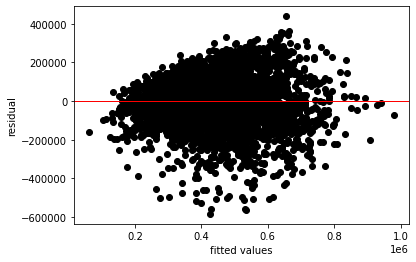

In [60]:
# plotting our residuals
# 

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are not evenly distributed around the mean. There are more residuals below than there are above the mean.

Checking for heteroskedaticity using Barlett's test

In [61]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('The critical value is:', critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

The critical value is: 4399.430358118845
the variances are homogeneous!


Cross validation using Leave one out

In [62]:
from sklearn.model_selection import LeaveOneOut

X = above[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']].values
y = above['price'].values

folds = LeaveOneOut()

# if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0  
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 15068 folds
trained 15068 models


98368.68859086376

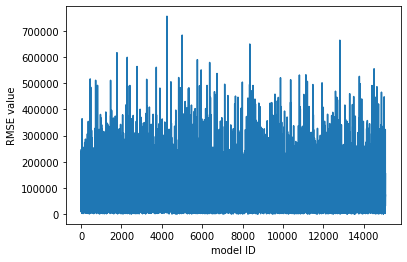

In [63]:
#  plotting out the RMSE values across all models
# 

import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

**Limitations of Linear regression** 

Linear Regression Only Looks at the Mean of the Dependent Variable

It is sensitive to outliers and multicollinearity.


#### Quantile regression

In [65]:
# defining our x and y
# splitting the data to train and test sets
# 
X = above[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']].values
y = above['price'].values

# standardizing our data
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)

# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + grade + sqft_basement + yr_built + zipcode + sqft_living15 + sqft_lot15', above)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2100
Model:                       QuantReg   Bandwidth:                   2.246e+04
Method:                 Least Squares   Sparsity:                    3.784e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:47:59   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.5232      0.477    -22.075      0.000     -11.458      -9.589
bedrooms      -1.084e+04   1593.446     -6.801      0.000    -1.4e+04   -7713.390
bathrooms      1.404e+04   2455.152      5.717      0.000    9224.419    1.88e+04
sqft_living      41.6206      3.239  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2331
Model:                       QuantReg   Bandwidth:                   2.143e+04
Method:                 Least Squares   Sparsity:                    3.337e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:02   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -17.9204      0.556    -32.245      0.000     -19.010     -16.831
bedrooms      -1.364e+04   1844.516     -7.397      0.000   -1.73e+04      -1e+04
bathrooms      1.967e+04   2858.555      6.880      0.000    1.41e+04    2.53e+04
sqft_living      43.3038      3.685  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2579
Model:                       QuantReg   Bandwidth:                   2.184e+04
Method:                 Least Squares   Sparsity:                    3.080e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:05   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6819      0.597     -6.171      0.000      -4.851      -2.512
bedrooms      -1.907e+04   1957.523     -9.743      0.000   -2.29e+04   -1.52e+04
bathrooms      2.095e+04   3093.218      6.772      0.000    1.49e+04     2.7e+04
sqft_living      52.0360      3.923  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2833
Model:                       QuantReg   Bandwidth:                   2.287e+04
Method:                 Least Squares   Sparsity:                    3.034e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:08   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -20.7438      0.635    -32.658      0.000     -21.989     -19.499
bedrooms      -1.909e+04   2055.934     -9.286      0.000   -2.31e+04   -1.51e+04
bathrooms      2.061e+04   3237.440      6.365      0.000    1.43e+04     2.7e+04
sqft_living      61.7443      4.168  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3073
Model:                       QuantReg   Bandwidth:                   2.344e+04
Method:                 Least Squares   Sparsity:                    3.116e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:11   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -73.2147      0.669   -109.377      0.000     -74.527     -71.903
bedrooms      -1.624e+04   2153.010     -7.543      0.000   -2.05e+04    -1.2e+04
bathrooms      1.619e+04   3393.193      4.773      0.000    9543.920    2.28e+04
sqft_living      71.1733      4.414  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3306
Model:                       QuantReg   Bandwidth:                   2.269e+04
Method:                 Least Squares   Sparsity:                    3.067e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:14   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.0462      0.651    -44.651      0.000     -30.321     -27.771
bedrooms      -1.638e+04   2084.052     -7.859      0.000   -2.05e+04   -1.23e+04
bathrooms      1.467e+04   3283.243      4.469      0.000    8237.608    2.11e+04
sqft_living      80.1103      4.305  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3513
Model:                       QuantReg   Bandwidth:                   2.118e+04
Method:                 Least Squares   Sparsity:                    3.256e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:17   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.9834      0.656     25.874      0.000      15.697      18.270
bedrooms      -1.382e+04   2092.105     -6.606      0.000   -1.79e+04   -9720.272
bathrooms      1.317e+04   3287.103      4.006      0.000    6723.663    1.96e+04
sqft_living      87.3969      4.389  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3642
Model:                       QuantReg   Bandwidth:                   1.978e+04
Method:                 Least Squares   Sparsity:                    4.422e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:48:20   Df Residuals:                    15055
                                        Df Model:                           12
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        51.5458      0.794     64.955      0.000      49.990      53.101
bedrooms       -1.78e+04   2505.836     -7.102      0.000   -2.27e+04   -1.29e+04
bathrooms      1.463e+04   3972.166      3.683      0.000    6842.919    2.24e+04
sqft_living     100.8038      5.418  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [67]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#

mod = smf.quantreg('y ~ X', above)
res = mod.fit(q=.5)

# Then print out the summary of our model
#

print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3073
Model:                       QuantReg   Bandwidth:                   2.344e+04
Method:                 Least Squares   Sparsity:                    3.116e+05
Date:                Sat, 29 May 2021   No. Observations:                15068
Time:                        02:50:32   Df Residuals:                    15055
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.2147      0.669   -109.377      0.000     -74.527     -71.903
X[0]       -1.624e+04   2153.010     -7.543      0.000   -2.05e+04    -1.2e+04
X[1]        1.619e+04   3393.193      4.773      0.000    9543.920    2.28e+04
X[2]          71.1733      4.414     16.125      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [68]:
# finding the RSME AND R2 score for our model
# 
y_pred = res.predict()
print('Quantile Regression Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

# Making predictions & checking accuracy using R2 score
quant = r2_score(y, y_pred)
print("The R2 score for the quantile model is:", quant)

Quantile Regression Root Mean Squared Error: 126810.73250556637
The R2 score for the quantile model is: 0.5018000886545932


The quantile model also has a much better R2 Score, 0.50, than the linear regression model meaning it is doing much better.
It also has a much lower RMSE making it a better model than linear regression.


**Limitations of ridge regression** 

Parameters are harder to estimate than in gaussian or generalized regression.

#### Ridge Regression

In [69]:
# defining our x and y
# splitting the data to train and test sets
# 
X = above[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']].values
y = above['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [71]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is.

15862491943.16476

In [72]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

16024859971.296684


In [73]:
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_, house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 74.54897082350908,
 'bedrooms': 17121.275337461822,
 'condition': 98443.96810929276,
 'floors': 23968.010615855008,
 'grade': 27.732065278514483,
 'price': -15480.478885812045,
 'sqft_above': -2597.7836571672156,
 'sqft_basement': 64.45994685264901,
 'sqft_living': -3.531284695956856,
 'sqft_lot': 26154.50385644359,
 'yr_built': 61.32822368685174,
 'zipcode': -5.848935840302147}

In [74]:
# finding the mean squared error and R2 Score
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print('Ridge model Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Making predictions & checking accuracy using R2 score
c = r2_score(y_test, y_pred)
print("The R2 score for the ridge model is:", c)

Ridge model Root Mean Squared Error: 128506.52195643348
The R2 score for the ridge model is: 0.4969217454642738




The Ridge model has a slightly lesser Root Mean Squared Error of 128506.52 than the linear model which has 128507.98 meaning it's functioning a bit better

**Limitations of ridge regression**  
Ridge regression decreases the complexity of a model but does not reduce the number of variables because it does not reduce coefficients to zero. Hence, this model is not good for feature reduction if feature reduction is necessary.

#### Lasso Regression

In [75]:
# importing necessary libraries
# 

from sklearn.linear_model import Lasso

In [76]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# defining our x and y
# 

X = above[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']].values
y = above['price'].values

# Scaling data 
#
scaler = StandardScaler()
scaler.fit_transform(X)


array([[-0.33890352, -1.50602534, -1.03120475, ...,  1.84758562,
        -0.89825568, -0.41583682],
       [-1.63532351, -1.50602534, -1.69851728, ..., -0.96411348,
         1.81934559,  0.38738607],
       [ 0.95751646,  1.59260098,  0.23831665, ...,  1.06030987,
        -0.85887016, -0.63229407],
       ...,
       [-1.63532351, -1.89335363, -1.2916194 , ...,  1.21026715,
        -1.52842409, -1.62899645],
       [-0.33890352,  0.8179444 , -0.34761631, ..., -0.98285814,
        -0.76040634, -1.86876448],
       [-1.63532351, -1.89335363, -1.2916194 , ...,  1.21026715,
        -1.52842409, -1.8454537 ]])

In [77]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 
print("lasso R2 score:", gridlasso.score(X_test, y_test))
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)


lasso best parameters: {'alpha': 13.0}
lasso R2 score: 0.49692552778692767
The RMSE for the lasso model: 128506.52195643348
lasso best estimator coef: [-1.64733120e+04  2.08092969e+04  7.01781907e+01 -3.97308692e+00
  2.67509848e+04  2.49660913e+04  9.76190179e+04  3.19339313e+01
 -2.64174718e+03  3.15613797e+01  6.50707122e+01 -5.23659420e+00]


Lasso Regression is doing slightly better than linear regression with an R2 Score of 0.49692 and RMSE of 128506.52

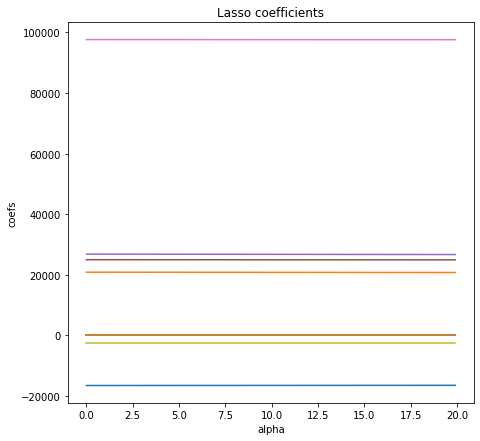

In [78]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

**Limitations of lasso regression**  
* If the number of predictors is greater than the number of observations, lasso will pick a few predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
* If there are two or more highly collinear variables then LASSO regression selects one of them randomly which is not good for the interpretation of data

#### Elastic Net Regression

In [79]:
# defining our x and y
# splitting the data to train and test sets
# 
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
       'zipcode', 'sqft_living15', 'sqft_lot15']]
y = above['price'].values

# Standardizing our data
scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
# importing necessary libraries

from sklearn.linear_model import ElasticNet

In [81]:
# Elastic Net Model
# just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
#   

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [82]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength.

search.fit(X_train,y_train)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [83]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

16149061261.9463

In [84]:
# Fitting the model

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)
e = r2_score(y_test,y_pred)

# getting RMSE & R2 score
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the Elastic model is:", e)

The RMSE for the Elastic model: 128523.17263823186
The R2 score for the Elastic model is: 0.49679136860107376


In [85]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 19540.479299871415,
 'bedrooms': -14975.054290818513,
 'condition': 25600.561514994042,
 'floors': 26117.951216623427,
 'grade': 94139.53781818076,
 'sqft_basement': 32.996836618195225,
 'sqft_living': 68.7470768180853,
 'sqft_living15': 65.7416387375873,
 'sqft_lot': -3.8916781407656367,
 'sqft_lot15': -5.201731379754952,
 'yr_built': -2499.1428359066313,
 'zipcode': 45.15497479065697}

**Limitations of elastic net regression**  
A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions.

### **Conclusion**

After going through the 5 models, it was observed that they all have similar performances with the R2 score being 49% for all except the quantile regression model which had 50%


### **Recommendations**

As observed fom our analysis, the quantile model is the best performing model with an RMSE of 126810.73 and R2 Score of 0.5018. This would be the best model to use for making predictions for house prices. 

However more analysis needs to be done to improve on the performance of the model as 50% is not satisfactory.

The worst performing model was the Elastic Net model with an RMSE of 128523.17 and an R2 Score of 0.4967, making it not an ideal model to use to make predictions for house prices.

##**8**. Challenging the solution

An accuracy of 49% is not satisfactory and more analysis needs to be done to improve model performance and higher accuracy levels.

##**9**. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did, we had a good sample size that looked into key factors that would help us predict housing prices using different models



### b). Do we need other data to answer our question?
Not necessarily because the dataset we used answered our question.

### c). Did we have the right question?

Yes we did, we were able to create models that helped made predictions of the housing prices
